In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")

categories = ["low", "medium", "high"]

df["PriceCategory"], bins = pd.qcut(
    df["SalePrice"],
    q=3,
    labels=categories,
    retbins=True,
    duplicates="drop"
)

for category in categories:
    print(f"{category}: {(df["PriceCategory"] == category).sum()}")


low: 487
medium: 490
high: 483


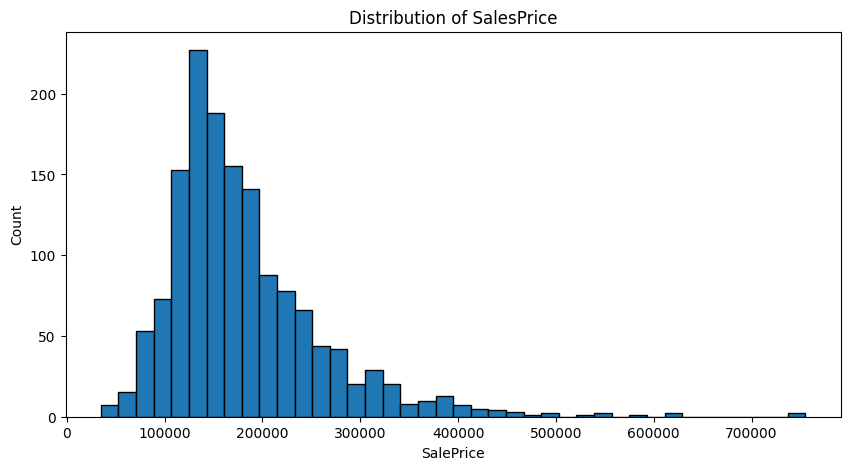

In [15]:
# Univariate Visualization: Histogram of SalesPrice

plt.figure(figsize=(10,5))
plt.hist(df['SalePrice'], bins=40, edgecolor='black')
plt.title("Distribution of SalesPrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

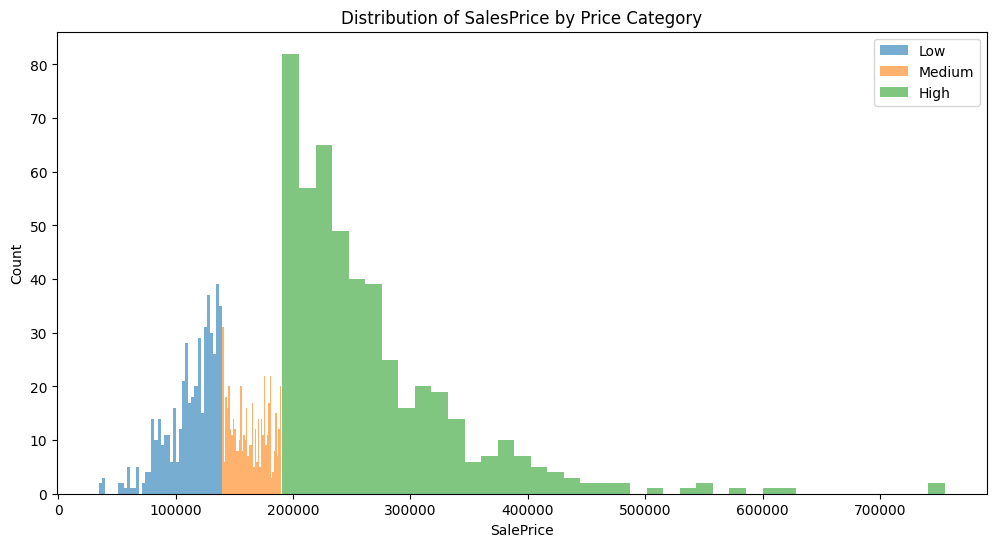

In [16]:
# Univariate Visualization: Histogram of SalesPrice by Price Category

import matplotlib.pyplot as plt

# Assumes df has a column named "PriceCategory" with values: low, medium, high
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # blue, orange, green

plt.figure(figsize=(12,6))

for cat, color in zip(categories, colors):
    subset = df[df["PriceCategory"] == cat]["SalePrice"]
    plt.hist(subset, bins=40, alpha=0.6, label=cat.capitalize(), color=color)

plt.title("Distribution of SalesPrice by Price Category")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.legend()
plt.show()

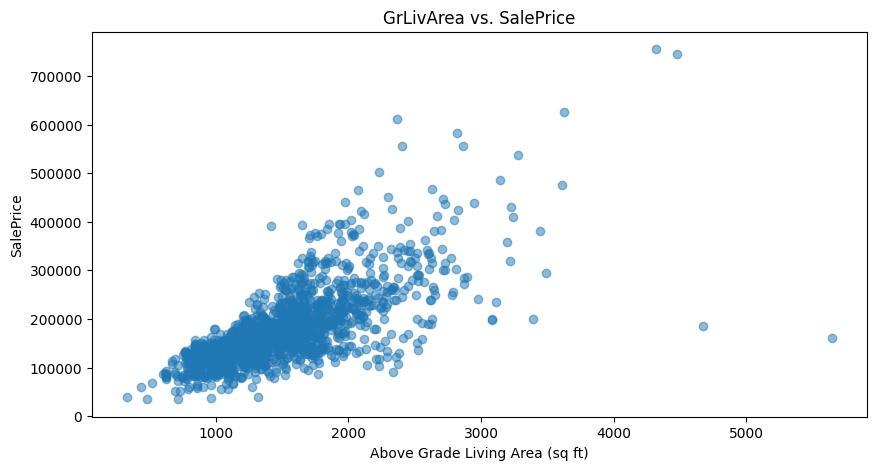

In [17]:
# Bivariate Visualization: GrLivArea vs SalePrice
plt.figure(figsize=(10,5))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
plt.title("GrLivArea vs. SalePrice")
plt.xlabel("Above Grade Living Area (sq ft)")
plt.ylabel("SalePrice")
plt.show()

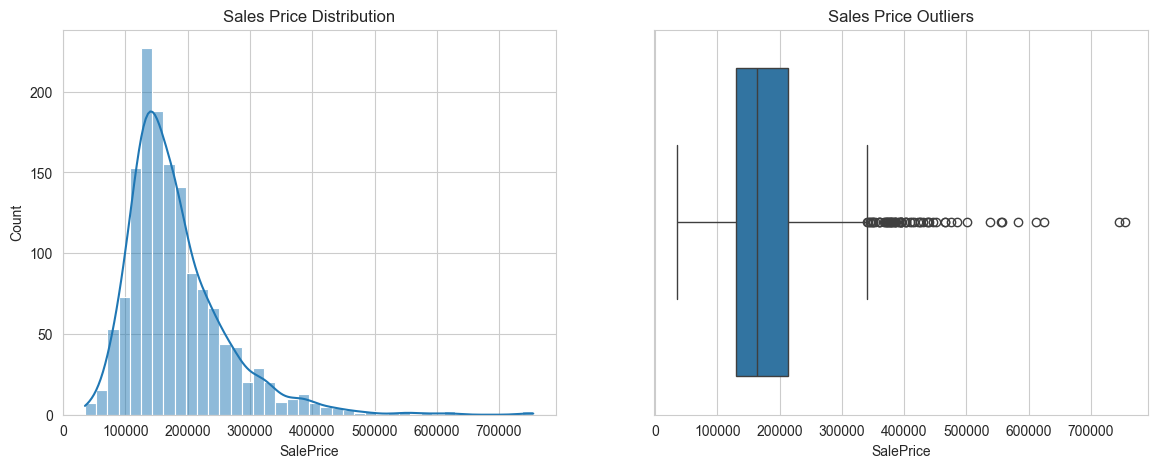

In [27]:
plt.figure(figsize=(14,5))
sns.set_style("whitegrid")

# Histogram
plt.subplot(1,2,1)
sns.histplot(df["SalePrice"], kde=True, bins=40)
plt.title("Sales Price Distribution")

# Boxplot showing outliers
plt.subplot(1,2,2)
sns.boxplot(x=df["SalePrice"])
plt.title("Sales Price Outliers")

plt.show()

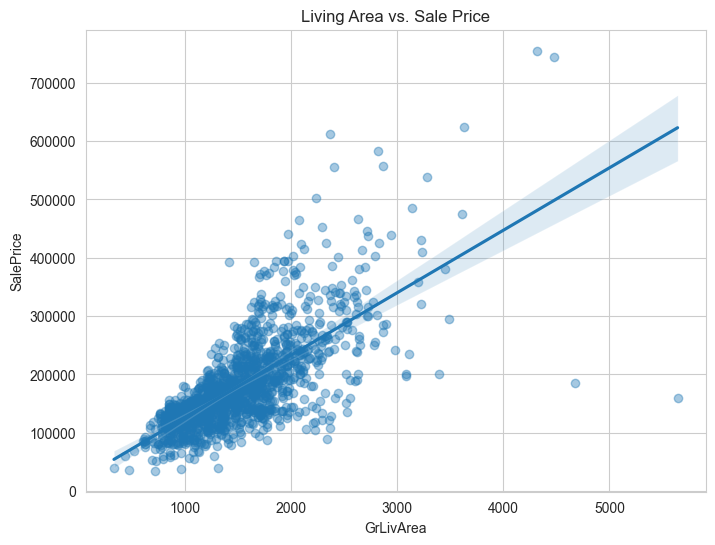

In [29]:
plt.figure(figsize=(8,6))
sns.regplot(x="GrLivArea", y="SalePrice", data=df, scatter_kws={"alpha":0.4})
plt.title("Living Area vs. Sale Price")
plt.show()

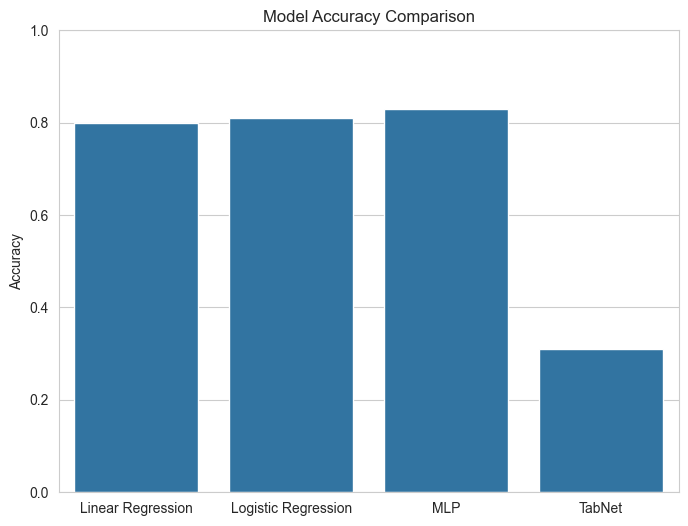

In [ ]:
import numpy as np

# bivariate - predictions vs reality
# Example accuracy data — replace with real results
model_names = ["Linear Regression", "Logistic Regression", "MLP", "TabNet"]
accuracies = [0.80, 0.81, 0.83, 0.31]  # Example only

plt.figure(figsize=(8,6))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

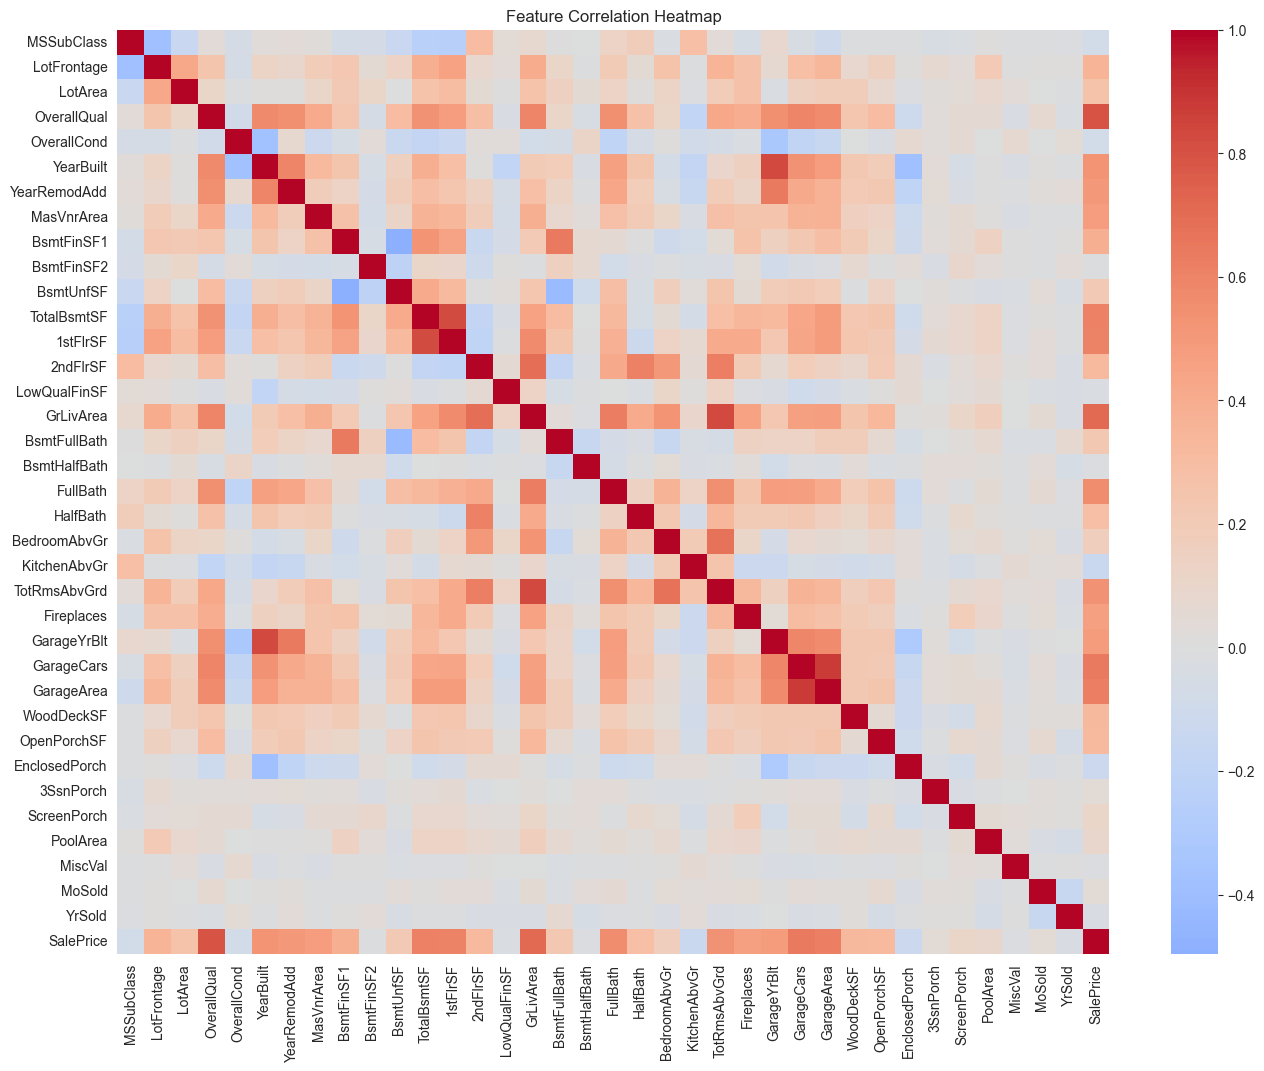

In [28]:
# multivariate correlation heatmap
plt.figure(figsize=(16,12))
corr = df.drop(columns=["Id"]).corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()